# Lecture 8: Mathematical morphology

## WARNING: There is a potentially very confusing moment here: 
* In Sonka et al (the reading material), the foreground is black and the background is white
* More standard (and in skimage), the foreground is white and the background is black
* We will follow Sonka's standard from Example 3 on unless otherwise is stated.
* As a result, we will be using skimage operations with wrong-sounding names, because "opening" in the Sonka convention is "closing" in the skimage convention, and vice versa. Similar dualities exist for other operations.
* Of course, this very concretely illustrates the dual nature of the morphological operations
* However, you might easily get confused. If you do, please ask!

In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import skimage
import matplotlib
from skimage import io
from skimage import color
from matplotlib import cm
matplotlib.rcParams['figure.figsize'] = (20,10)
%matplotlib inline

from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import black_tophat, white_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk, square, rectangle, diamond #structuring elements

# Part 1: Binary morphology

Content:
* Dilation and erosion
* Duality
* Morphological gradient
* Opening and closing
* Skeletonization
* Granulometry

### Example 1: Dilation and erosion

In this first example, we show how dilation and erosion behave in the most typical setting, where foreground is white and background is black.

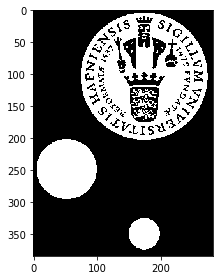

In [3]:
# Read test image
f = color.rgb2gray(io.imread('images/TestImage.png', plugin='pil'))

io.imshow(f)

Text(0.5, 1.0, 'Structuring element')

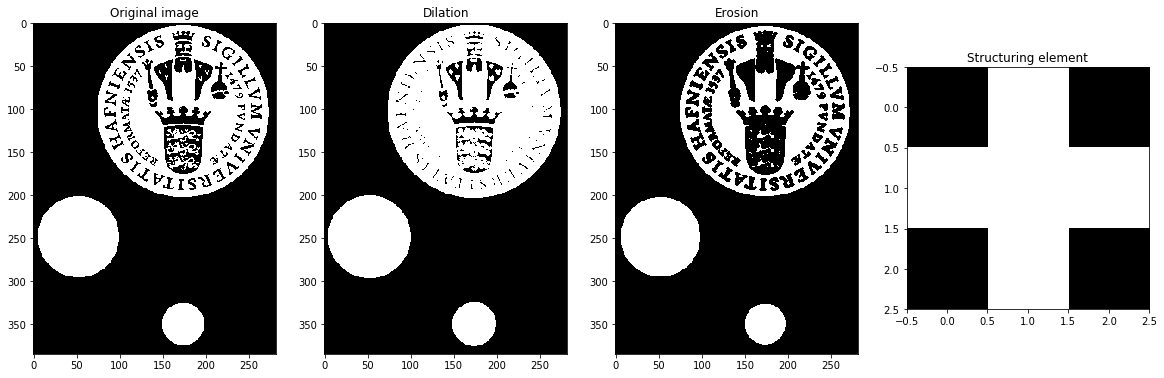

In [4]:
# Compute dilation and erosion
selem = disk(1)
f_dilated = binary_dilation(f, selem)
f_eroded = binary_erosion(f, selem)

# View image, dilation and erosion
matplotlib.rcParams['figure.figsize'] = (20,10)

fig, ax = plt.subplots(1,4)
ax[0].imshow(f, cmap=cm.Greys_r)
ax[1].imshow(f_dilated, cmap=cm.Greys_r)
ax[2].imshow(f_eroded, cmap=cm.Greys_r)
ax[3].imshow(selem, cmap=cm.Greys_r)
ax[0].set_title('Original image')
ax[1].set_title('Dilation')
ax[2].set_title('Erosion')
ax[3].set_title('Structuring element')

### Example 2: Duality

In this example, we show how dilation of the dual image is erosion of the original image, etc

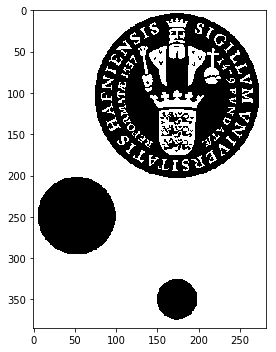

In [5]:
# First, make a dual image
fdual = 255-f

# Visualize it
matplotlib.rcParams['figure.figsize'] = (10,5)
io.imshow(fdual)

Text(0.5, 1.0, 'Dilation of dual image')

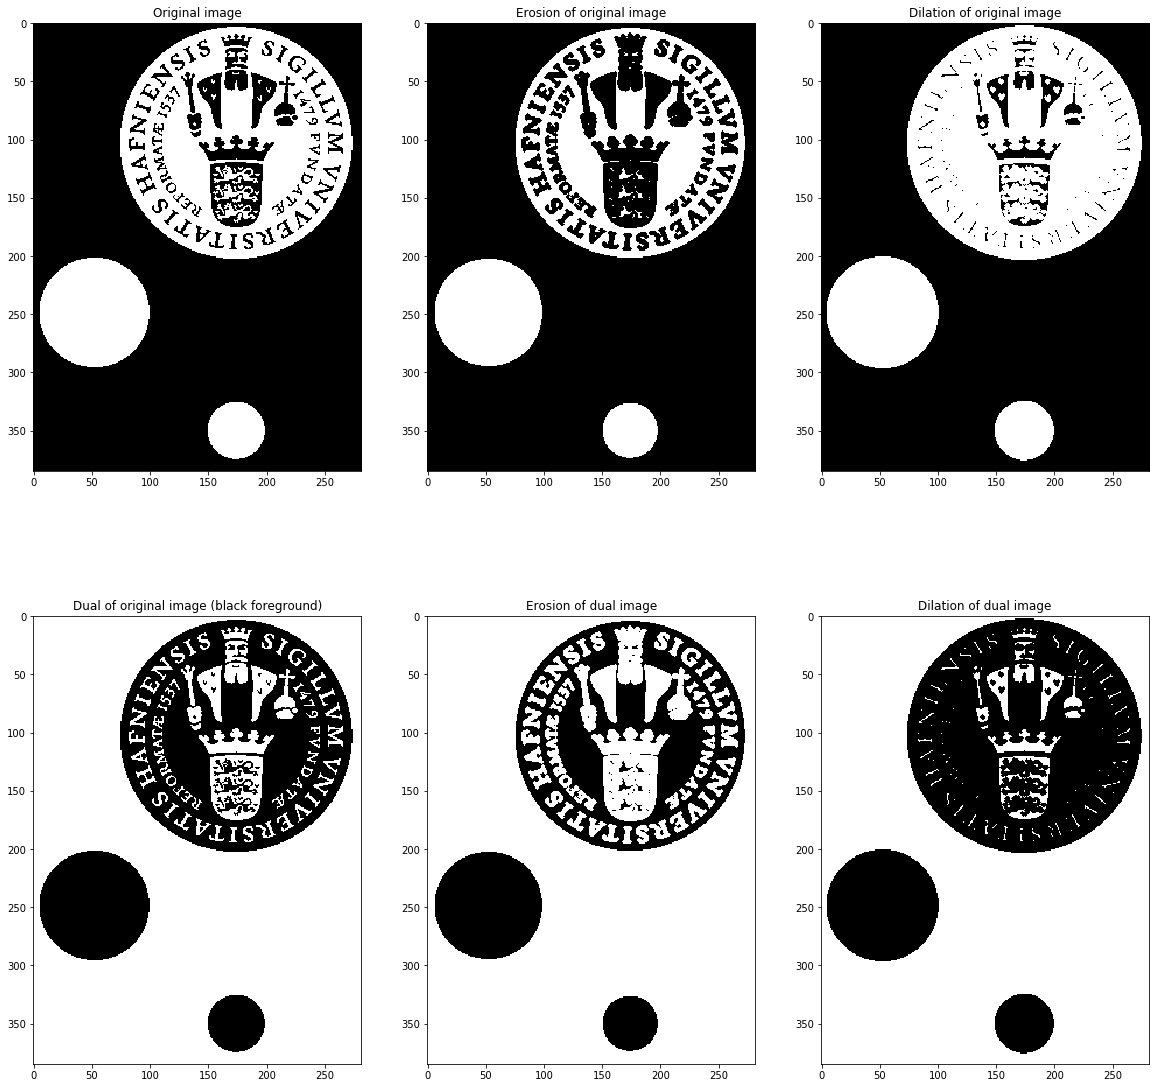

In [6]:
# Next, we perform erosion/dilation and dilation/erosion on fbin/fdual, and compare the results
fdual_eroded = binary_dilation(fdual,selem)
fdual_dilated = binary_erosion(fdual, selem)

# View results
matplotlib.rcParams['figure.figsize'] = (20,20)

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(f, cmap=cm.Greys_r)
ax[1,0].imshow(fdual, cmap=cm.Greys_r)
ax[0,1].imshow(f_eroded, cmap=cm.Greys_r)
ax[1,1].imshow(fdual_eroded, cmap=cm.Greys_r)
ax[0,2].imshow(f_dilated, cmap=cm.Greys_r)
ax[1,2].imshow(fdual_dilated, cmap=cm.Greys_r)

ax[0,0].set_title('Original image')
ax[1,0].set_title('Dual of original image (black foreground)')
ax[0,1].set_title('Erosion of original image')
ax[1,1].set_title('Erosion of dual image')
ax[0,2].set_title('Dilation of original image')
ax[1,2].set_title('Dilation of dual image')

### In the continuation, we will work in the "black foreground" convention, just like Sonka.

This means we will be using dual operations in the continuation, and we will use the fdual image.

Text(0.5, 1.0, 'Test image')

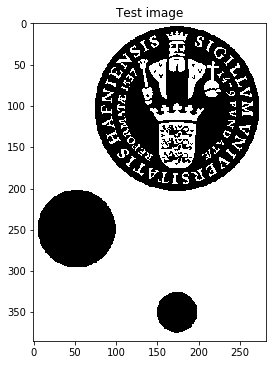

In [7]:
#View test image
matplotlib.rcParams['figure.figsize'] = (10,5)

fbin = fdual
io.imshow(fbin)
plt.title('Test image')

### Example 3: Finding contours using morphological gradient
Contours can be found quickly by using the morphological gradient -- removing the erosion from the dilation.

Text(0.5, 1.0, 'Morphological gradient')

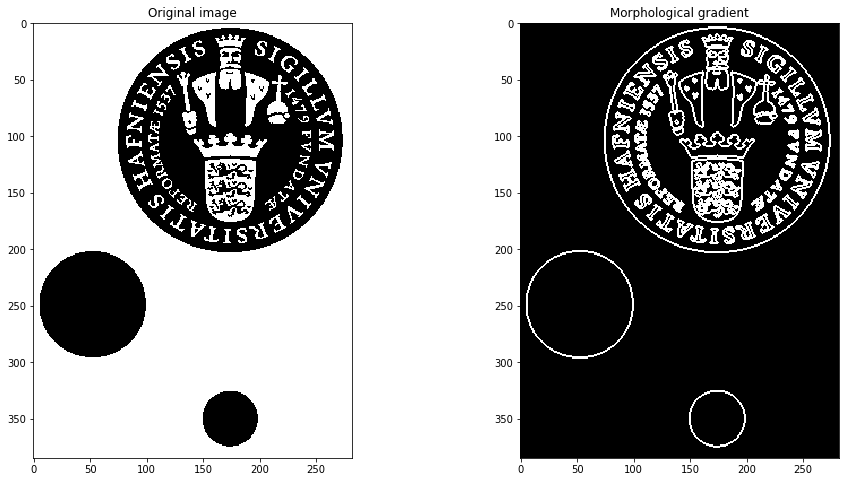

In [8]:
# Compute morphological gradient
gradient = f_dilated.astype(float)-f_eroded.astype(float)

# View image, dilation and erosion
matplotlib.rcParams['figure.figsize'] = (16,8)
fig, ax = plt.subplots(1,2)
ax[0].imshow(fbin, cmap=cm.Greys_r)
ax[1].imshow(gradient, cmap=cm.Greys_r)
ax[0].set_title('Original image')
ax[1].set_title('Morphological gradient')

### Example 4: Opening and closing
Opening and closing are both phrased in terms of erosion and dilation:
* Opening = erosion followed by dilation = dilation of erosion
* Closing = dilation followed by erosion = erosion of dilation

Since erosion and dilation are dual operations of each other, opening and closing are also dual operations of each other.

That means, that since we are in the "black foreground, white background" convention, and skimage is in the "white foreground, black background" convention, we will be using the skimage functions for closing in order to do opening, etceretera.

Text(0.5, 1.0, 'Dilation of erosion')

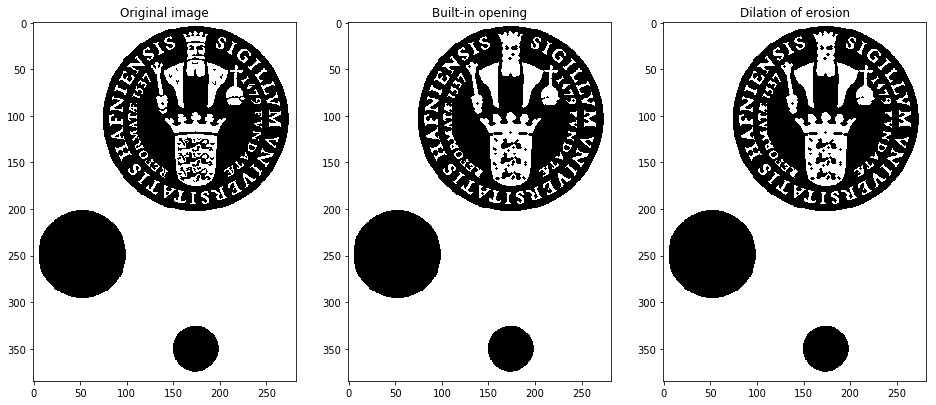

In [9]:
# Perform opening and compare it to dilation of erosion
opened_builtin = binary_closing(fbin)
opened = binary_erosion(fdual_eroded) 
# Recall: Because of duality, binary_erosion corresponds to dilation

# View image, built-in opening and dilation of erosion
fig, ax = plt.subplots(1,3)
ax[0].imshow(fbin, cmap=cm.Greys_r)
ax[1].imshow(opened_builtin, cmap=cm.Greys_r)
ax[2].imshow(opened, cmap=cm.Greys_r)

ax[0].set_title('Original image')
ax[1].set_title('Built-in opening')
ax[2].set_title('Dilation of erosion')

0


Text(0.5, 1.0, 'Dilation of erosion')

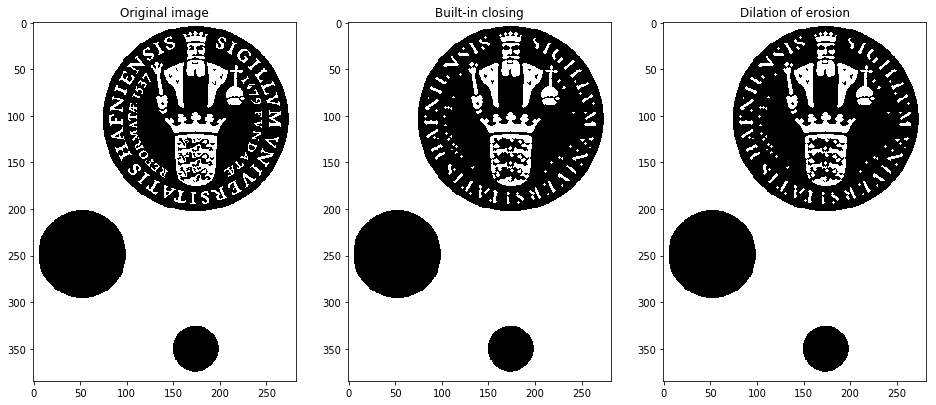

In [12]:
# Next, we perform closing and compare it to erosion of dilation
closed_builtin = binary_opening(fbin)
closed = binary_dilation(fdual_dilated) 
# Recall: Because of duality, binary_dilation corresponds to erosion

# View image, built-in closing and erosion of dilation
fig, ax = plt.subplots(1,3)
ax[0].imshow(fbin, cmap=cm.Greys_r)
ax[1].imshow(closed_builtin, cmap=cm.Greys_r)
ax[2].imshow(closed, cmap=cm.Greys_r)
ax[0].set_title('Original image')
ax[1].set_title('Built-in closing')
ax[2].set_title('Dilation of erosion')

### Example 5: Exercise in understanding morphology
Using the different operations above, on the images loaded and viewed below, experiment as follows:
* Compare different structuring elements
* Compare different structuring element sizes, for instance using disk(n) with a variable radius n
* Can you see some obvious uses of morphology?

Text(0.5, 1.0, 'Translation')

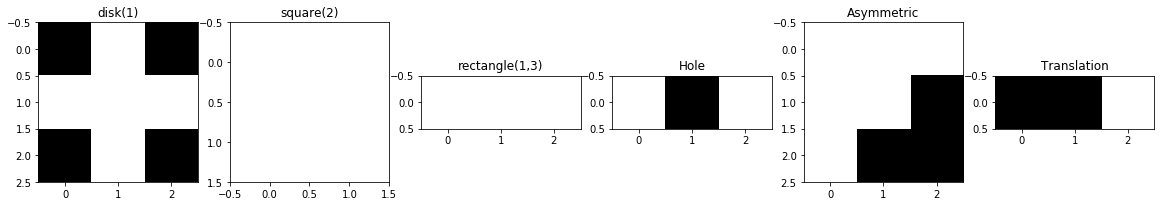

In [20]:
# Different structuring elements
selem_disk = disk(1)
selem_square = square(2)
selem_rectangle = rectangle(1,3)
selem_hole = np.array([1, 0, 1]).reshape(1,3)
selem_asymm = np.array([[1, 1, 1], [1, 1, 0], [1, 0, 0]])
selem_trans = np.array([0,0,1]).reshape(1,3)

# Visualize them
matplotlib.rcParams['figure.figsize'] = (20,10)
fig, ax = plt.subplots(1,6)
ax[0].imshow(selem_disk, cmap=cm.Greys_r, vmax=1, vmin=0)
ax[1].imshow(selem_square, cmap=cm.Greys_r, vmax=1, vmin=0)
ax[2].imshow(selem_rectangle, cmap=cm.Greys_r, vmax=1, vmin=0)
ax[3].imshow(selem_hole, cmap=cm.Greys_r, vmax=1, vmin=0)
ax[4].imshow(selem_asymm, cmap=cm.Greys_r, vmax=1, vmin=0)
ax[5].imshow(selem_trans, cmap=cm.Greys_r, vmax=1, vmin=0)

ax[0].set_title('disk(1)')
ax[1].set_title('square(2)')
ax[2].set_title('rectangle(1,3)')
ax[3].set_title('Hole')
ax[4].set_title('Asymmetric')
ax[5].set_title('Translation')

In [ ]:
# Open/generate images
# 1. dendrite
dendrite = io.imread('images/dendrite.png')
green_thr = dendrite[:,:,1]< 100
# 2. toy example
toyex = np.array([[0, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]])
# 3. logo with salt and pepper noise
fnoise = skimage.util.random_noise(fbin, mode='salt')

In [ ]:
# View the images
fig, ax = plt.subplots(1,3)
ax[0].imshow(green_thr, cmap=cm.Greys_r)
ax[1].imshow(toyex, cmap=cm.Greys_r)
ax[2].imshow(fnoise, cmap=cm.Greys_r)

ax[0].set_title('Output of simple dendrite segmentation')
ax[1].set_title('Toy example')
ax[2].set_title('Logo with salt noise')

Use the cell below for playing around with the three images and the different structuring elements.

In [ ]:
# Playground!



### Application 1: Skeletonization

In [ ]:
palm = color.rgb2gray(io.imread('images/palm.png'))
skel = skeletonize(1-palm)

# View palm and its skeleton
fig, ax = plt.subplots(1,3)
ax[0].imshow(palm, cmap=cm.Greys_r)
ax[1].imshow(skel, cmap=cm.Greys_r)
ax[2].imshow(palm+skel, cmap=cm.Greys_r)

ax[0].set_title('Palm')
ax[1].set_title('Skeleton')
ax[2].set_title('Palm and skeleton')

Now, let's try skeletonization on a slightly edited example

In [ ]:
palm = color.rgb2gray(io.imread('images/palm_bumps.png'))
skel = skeletonize(1-palm)

# View palm and its skeleton
fig, ax = plt.subplots(1,3)
ax[0].imshow(palm, cmap=cm.Greys_r)
ax[1].imshow(skel, cmap=cm.Greys_r)
ax[2].imshow(palm+skel, cmap=cm.Greys_r)

ax[0].set_title('Palm with coconuts')
ax[1].set_title('Skeleton')
ax[2].set_title('Palm and skeleton')

### Application 2: Granulometry

(blackboard)

# Part 2: Grayscale morphology

Content:
* Gray-scale morphology
* Top hat transformations

### Example 6: Gray-scale morphology
We illustrate gray-scale morphological operations with flat structuring elements. Note that flat structuring elements are implemented as binary ones in skimage

Text(0.5, 1.0, 'Cameraman')

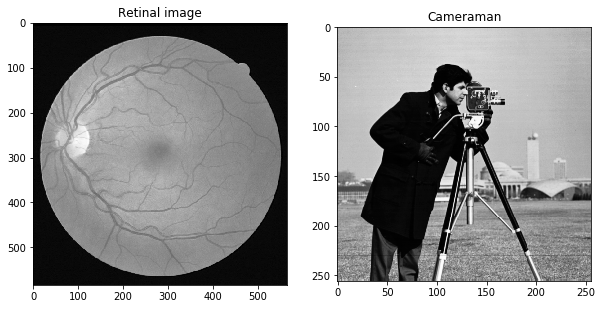

In [19]:
retinal = color.rgb2gray(io.imread('images/01_test.tif', plugin='pil'))
cman = color.rgb2gray(io.imread('images/cameraman.png'))

# View test images
matplotlib.rcParams['figure.figsize'] = (10,10)
fig, ax = plt.subplots(1,2)
ax[0].imshow(retinal, cmap=cm.Greys_r)
ax[1].imshow(cman, cmap=cm.Greys_r)

ax[0].set_title('Retinal image')
ax[1].set_title('Cameraman')

Perform erosion, dilation, opening and closing with the two images, using the same flat structuring elements as for binary morphology. Note that both images have dark foreground, and we use the Sonka (black foreground) convention.

In [ ]:
selem = disk(3)
retinal_eroded = dilation(retinal, selem)
retinal_dilated = erosion(retinal, selem)
retinal_opened = closing(retinal, selem)
retinal_closed = opening(retinal, selem)

# View test images
fig, ax = plt.subplots(2,3)
ax[0,0].imshow(retinal, cmap=cm.Greys_r)
ax[0,1].imshow(retinal_eroded, cmap=cm.Greys_r)
ax[0,2].imshow(retinal_dilated, cmap=cm.Greys_r)
ax[1,0].imshow(retinal_opened, cmap=cm.Greys_r)
ax[1,1].imshow(retinal_closed, cmap=cm.Greys_r)

ax[0,0].set_title('Retinal image')
ax[0,1].set_title('Erosion')
ax[0,2].set_title('Dilation')
ax[1,0].set_title('Opening')
ax[1,1].set_title('Closing')

Let's do the same with the cameraman, with three different sizes of structuring element

In [ ]:
### First use a structuring element disk of radius 1
selem = disk(1)
cman_eroded = dilation(cman, selem)
cman_dilated = erosion(cman, selem)
cman_opened = closing(cman, selem)
cman_closed = opening(cman, selem)

# View results
fig1, ax = plt.subplots(2,3)
ax[0,0].imshow(cman, cmap=cm.Greys_r)
ax[0,1].imshow(cman_eroded, cmap=cm.Greys_r)
ax[0,2].imshow(cman_dilated, cmap=cm.Greys_r)
ax[1,0].imshow(cman_opened, cmap=cm.Greys_r)
ax[1,1].imshow(cman_closed, cmap=cm.Greys_r)

ax[0,0].set_title('Cameraman image')
ax[0,1].set_title('Erosion')
ax[0,2].set_title('Dilation')
ax[1,0].set_title('Opening')
ax[1,1].set_title('Closing')

In [ ]:
### Now repeat with a larger structuring element

selem = disk(3)
cman_eroded = dilation(cman, selem)
cman_dilated = erosion(cman, selem)
cman_opened = closing(cman, selem)
cman_closed = opening(cman, selem)

# View result
fig2, ax = plt.subplots(2,3)
ax[0,0].imshow(cman, cmap=cm.Greys_r)
ax[0,1].imshow(cman_eroded, cmap=cm.Greys_r)
ax[0,2].imshow(cman_dilated, cmap=cm.Greys_r)
ax[1,0].imshow(cman_opened, cmap=cm.Greys_r)
ax[1,1].imshow(cman_closed, cmap=cm.Greys_r)

ax[0,0].set_title('Cameraman image')
ax[0,1].set_title('Erosion')
ax[0,2].set_title('Dilation')
ax[1,0].set_title('Opening')
ax[1,1].set_title('Closing')

In [ ]:
### Now repeat with a larger structuring element

selem = disk(5)
cman_eroded = dilation(cman, selem)
cman_dilated = erosion(cman, selem)
cman_opened = closing(cman, selem)
cman_closed = opening(cman, selem)

# View result
fig3, ax = plt.subplots(2,3)
ax[0,0].imshow(cman, cmap=cm.Greys_r)
ax[0,1].imshow(cman_eroded, cmap=cm.Greys_r)
ax[0,2].imshow(cman_dilated, cmap=cm.Greys_r)
ax[1,0].imshow(cman_opened, cmap=cm.Greys_r)
ax[1,1].imshow(cman_closed, cmap=cm.Greys_r)

ax[0,0].set_title('Cameraman image')
ax[0,1].set_title('Erosion')
ax[0,2].set_title('Dilation')
ax[1,0].set_title('Opening')
ax[1,1].set_title('Closing')

Let's in particular look at the closing of the retinal vessel, up close.

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(retinal, cmap=cm.Greys_r)
ax[1].imshow(opening(retinal, disk(1)), cmap=cm.Greys_r)

ax[0].set_title('Retinal image')
ax[1].set_title('Closing')

### Example 3: Top hat transformations on binary images
* The top hat removes the opening from the original image.
* In skimage, "white top hat" is top hat in the "white foreground, black background" convention
* We are in the "black foreground, white background convention, and need to use its dual -- called black tophat in skimage
* Note: The dual of tophat is sometimes called bottomhat

Text(0.5, 1.0, 'Black tophat')

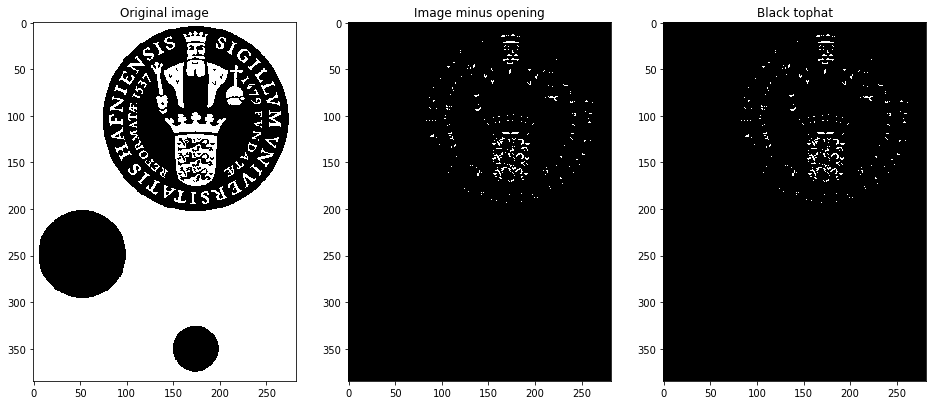

In [18]:
f = color.rgb2gray(io.imread('images/TestImage.png'))
fbin = 1 - (f>100)
selem = disk(1)
tophat1 = -(fbin-closing(fbin, selem)) # minus in front because the foreground is 0
tophat2 = black_tophat(fbin, selem)

fig, ax = plt.subplots(1,3)
ax[0].imshow(fbin, cmap=cm.Greys_r)
ax[1].imshow(tophat1, cmap=cm.Greys_r)
ax[2].imshow(tophat2, cmap=cm.Greys_r)

ax[0].set_title('Original image')
ax[1].set_title('Image minus opening')
ax[2].set_title('Black tophat')

### Example 4: Next, let's see what tophat does on the grayscale retinal images

Text(0.5, 1.0, 'Tophat with selem = disk(3)')

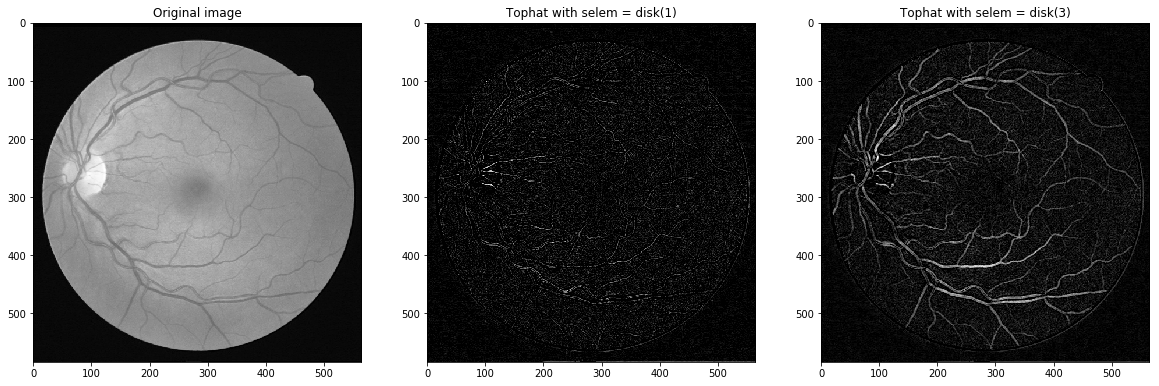

In [21]:
# First, the retinal image
fig, ax = plt.subplots(1,3)
ax[0].imshow(retinal, cmap=cm.Greys_r)
ax[1].imshow(black_tophat(retinal, disk(1)), cmap=cm.Greys_r)
ax[2].imshow(black_tophat(retinal, disk(3)), cmap=cm.Greys_r)

ax[0].set_title('Original image')
ax[1].set_title('Tophat with selem = disk(1)')
ax[2].set_title('Tophat with selem = disk(3)')

Use thresholding on original image as well as on tophat image. See how tophat reacts to local intensity differences, and is not sensitive to inhomogeneities in the background.

In [15]:
retinal_tophat = black_tophat(retinal, disk(3))
retinal_tophat_thr = retinal_tophat > 0.03
retinal_thr = retinal < 0.5

fig, ax = plt.subplots(1,3)
ax[0].imshow(retinal, cmap=cm.Greys_r)
ax[1].imshow(retinal_thr, cmap=cm.Greys_r)
ax[2].imshow(retinal_tophat_thr, cmap=cm.Greys_r)

ax[0].set_title('Original image')
ax[1].set_title('Thresholded original image')
ax[2].set_title('Thresholded tophat with selem = disk(3)')

NameError: name 'retinal' is not defined